In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv("datasets/nobel_final.csv")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   firstname              923 non-null    object
 1   surname                921 non-null    object
 2   born_country_code      923 non-null    object
 3   died_country_code      617 non-null    object
 4   gender                 923 non-null    object
 5   year                   923 non-null    int64 
 6   category               923 non-null    object
 7   share                  923 non-null    int64 
 8   name_of_university     697 non-null    object
 9   city_of_university     692 non-null    object
 10  country_of_university  693 non-null    object
 11  born_month             923 non-null    object
 12  age                    923 non-null    int64 
 13  age_get_prize          923 non-null    int64 
dtypes: int64(4), object(10)
memory usage: 101.1+ KB


In [7]:
data.describe()

,year,share,age,age_get_prize
count,923.000000,923.000000,923.000000,923.000000
mean,1971.102925,2.020585,79.346696,59.823402
std,33.606425,0.943415,11.134606,12.571109
min,1901.000000,1.000000,23.000000,17.000000
25%,1947.000000,1.000000,73.000000,51.000000
50%,1977.000000,2.000000,80.000000,60.000000
75%,2000.000000,3.000000,87.500000,69.000000
max,2019.000000,4.000000,103.000000,97.000000


In [38]:
data

,firstname,surname,born_country_code,died_country_code,gender,year,category,share,name_of_university,city_of_university,country_of_university,born_month,age,age_get_prize
0,Wilhelm Conrad,Röntgen,DE,DE,male,1901,physics,1,Munich University,Munich,Germany,Mar,78,56
1,Hendrik A.,Lorentz,NL,NL,male,1902,physics,2,Leiden University,Leiden,the Netherlands,Jul,75,49
2,Pieter,Zeeman,NL,NL,male,1902,physics,2,Amsterdam University,Amsterdam,the Netherlands,May,78,37
3,Henri,Becquerel,FR,FR,male,1903,physics,2,École Polytechnique,Paris,France,Dec,56,51
4,Pierre,Curie,FR,FR,male,1903,physics,4,École municipale de physique et de chimie indu...,Paris,France,May,47,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,Peter,Handke,AT,NaN,male,2019,literature,1,NaN,NaN,NaN,Dec,78,77
919,Abiy,Ahmed Ali,ET,NaN,male,2019,peace,1,NaN,NaN,NaN,Aug,44,43
920,Abhijit,Banerjee,IN,NaN,male,2019,economics,3,Massachusetts Institute of Technology (MIT),Cambridge MA,USA,Feb,59,58
921,Esther,Duflo,FR,NaN,female,2019,economics,3,Massachusetts Institute of Technology (MIT),Cambridge MA,USA,Oct,48,47


<AxesSubplot:title={'center':'Prizes by Gender'}, xlabel='Gender', ylabel='Prizes'>

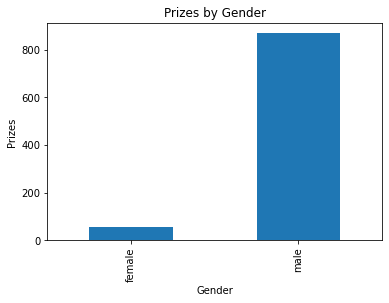

In [231]:
data.groupby('gender').size().plot(kind='bar',title='Prizes by Gender', xlabel='Gender', ylabel='Prizes')

<AxesSubplot:title={'center':'Prizes by Gender'}, ylabel='Gender'>

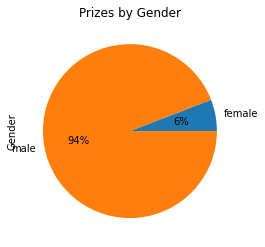

In [222]:
data.groupby('gender').size().plot(kind='pie', title='Prizes by Gender', ylabel='Gender', autopct='%1.0f%%')

In [172]:
cnt

,gender,category,size
0,female,chemistry,5
1,female,economics,2
2,female,literature,15
3,female,medicine,12
4,female,peace,17
5,female,physics,3
6,male,chemistry,179
7,male,economics,82
8,male,literature,101
9,male,medicine,207


<AxesSubplot:title={'center':'Noble Prize by Category'}, xlabel='Category', ylabel='Prizes'>

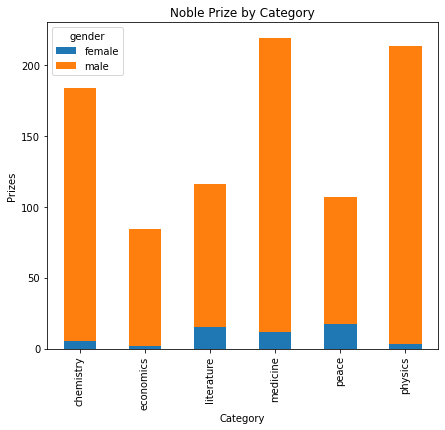

In [174]:
cnt=data.groupby(['category','gender']).size().unstack()
cnt.plot(kind='bar',stacked=True, title='Noble Prize by Category', xlabel='Category', ylabel='Prizes', figsize=(7,6))

In [175]:
cnt

gender,female,male
category,,
chemistry,5,179
economics,2,82
literature,15,101
medicine,12,207
peace,17,90
physics,3,210


In [4]:
subset=data.groupby('country_of_university', as_index=False).size().set_index('country_of_university')
subset=subset[subset['size']>1]

In [216]:
subset

,size
country_of_university,
Argentina,2
Australia,4
Austria,6
Belgium,5
Canada,8
Denmark,8
France,37
Germany,66
Israel,5


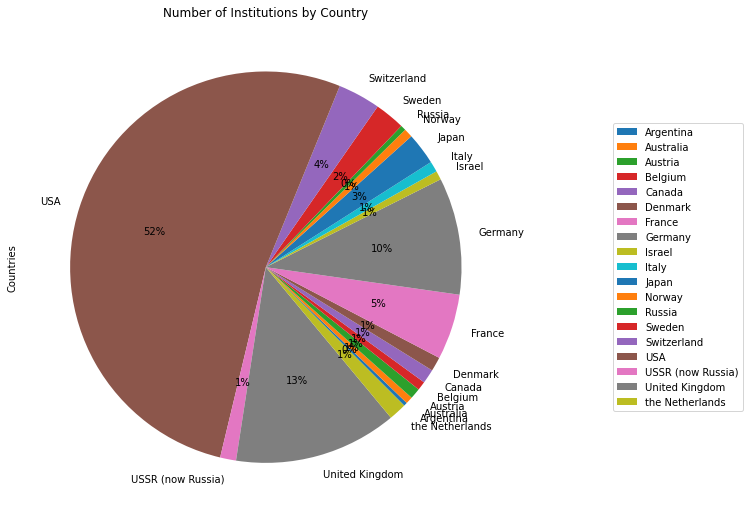

In [19]:
subset.plot(kind='pie', title='Number of Institutions by Country', x='country_of_university', y='size', ylabel='Countries', autopct='%1.0f%%', figsize=(9, 9), fontsize=10, startangle=315)
plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))

<AxesSubplot:xlabel='category'>

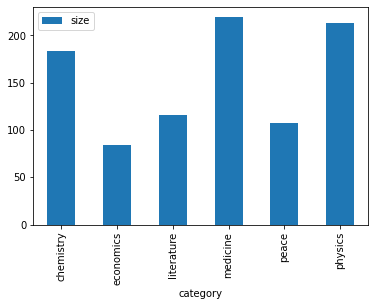

In [176]:
data.groupby('category', as_index=False).size().plot(kind='bar',x='category', stacked=True)

<AxesSubplot:title={'center':'Noble Prize by Birthplace'}, xlabel='Birthplace', ylabel='Prizes'>

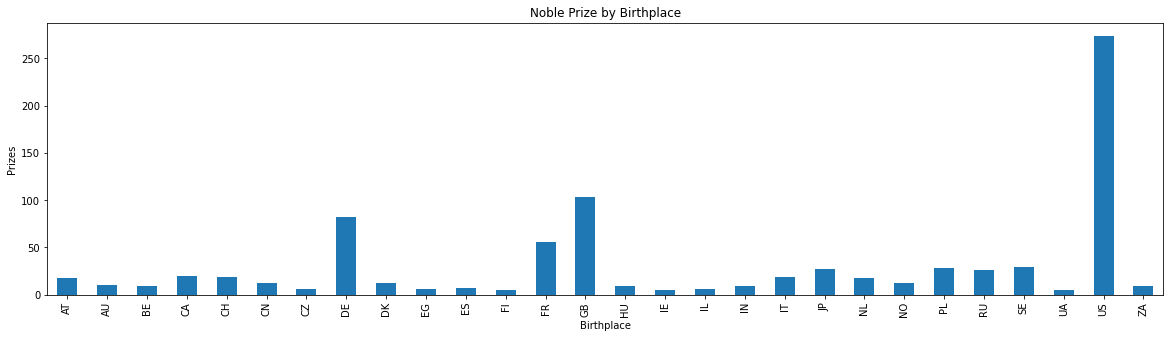

In [233]:
bornset=data.groupby('born_country_code', as_index=False).size()
bornset=bornset[bornset['size'] > 4]
bornset.plot(kind='bar', figsize=(20,5), x='born_country_code', title='Noble Prize by Birthplace', xlabel='Birthplace', ylabel='Prizes', legend=False)

<AxesSubplot:xlabel='gender', ylabel='category'>

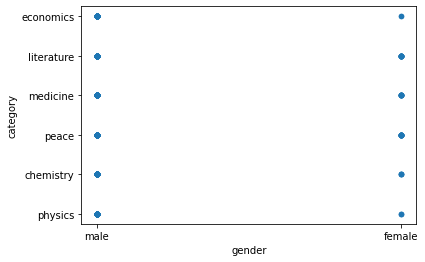

In [78]:
data.plot(kind='scatter',x='gender',y='category')

<AxesSubplot:>

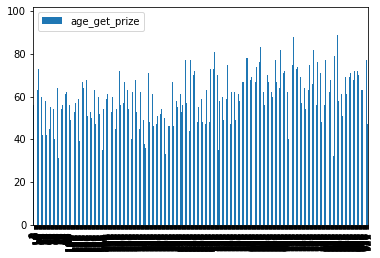

In [94]:
data[['gender','age_get_prize']].plot(kind='bar')

<AxesSubplot:>

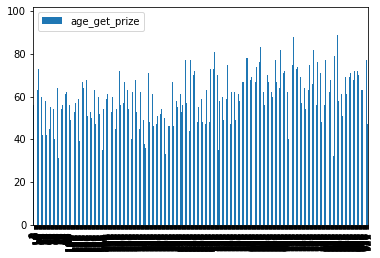

In [95]:
data[['category','age_get_prize']].plot(kind='bar')

<AxesSubplot:xlabel='category'>

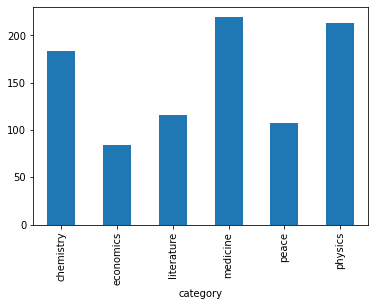

In [86]:
data.groupby('category').size().plot(kind='bar')

In [126]:
data.groupby('name_of_university', as_index=False).size()

,name_of_university,size
0,A.F. Ioffe Physico-Technical Institute,1
1,Aarhus University,1
2,Academy of Sciences,3
3,All Souls College,1
4,Amsterdam University,2
...,...,...
302,École Nationale Supérieur des Mines de Paris,1
303,École Normale Supérieure,1
304,École Polytechnique,2
305,École Supérieure de Physique et Chimie,1


In [224]:
subset=data.groupby('name_of_university', as_index=False).size()
subset

,name_of_university,size
0,A.F. Ioffe Physico-Technical Institute,1
1,Aarhus University,1
2,Academy of Sciences,3
3,All Souls College,1
4,Amsterdam University,2
...,...,...
302,École Nationale Supérieur des Mines de Paris,1
303,École Normale Supérieure,1
304,École Polytechnique,2
305,École Supérieure de Physique et Chimie,1


<AxesSubplot:title={'center':'Noble Prize by Institution'}, xlabel='Institutions', ylabel='Prizes'>

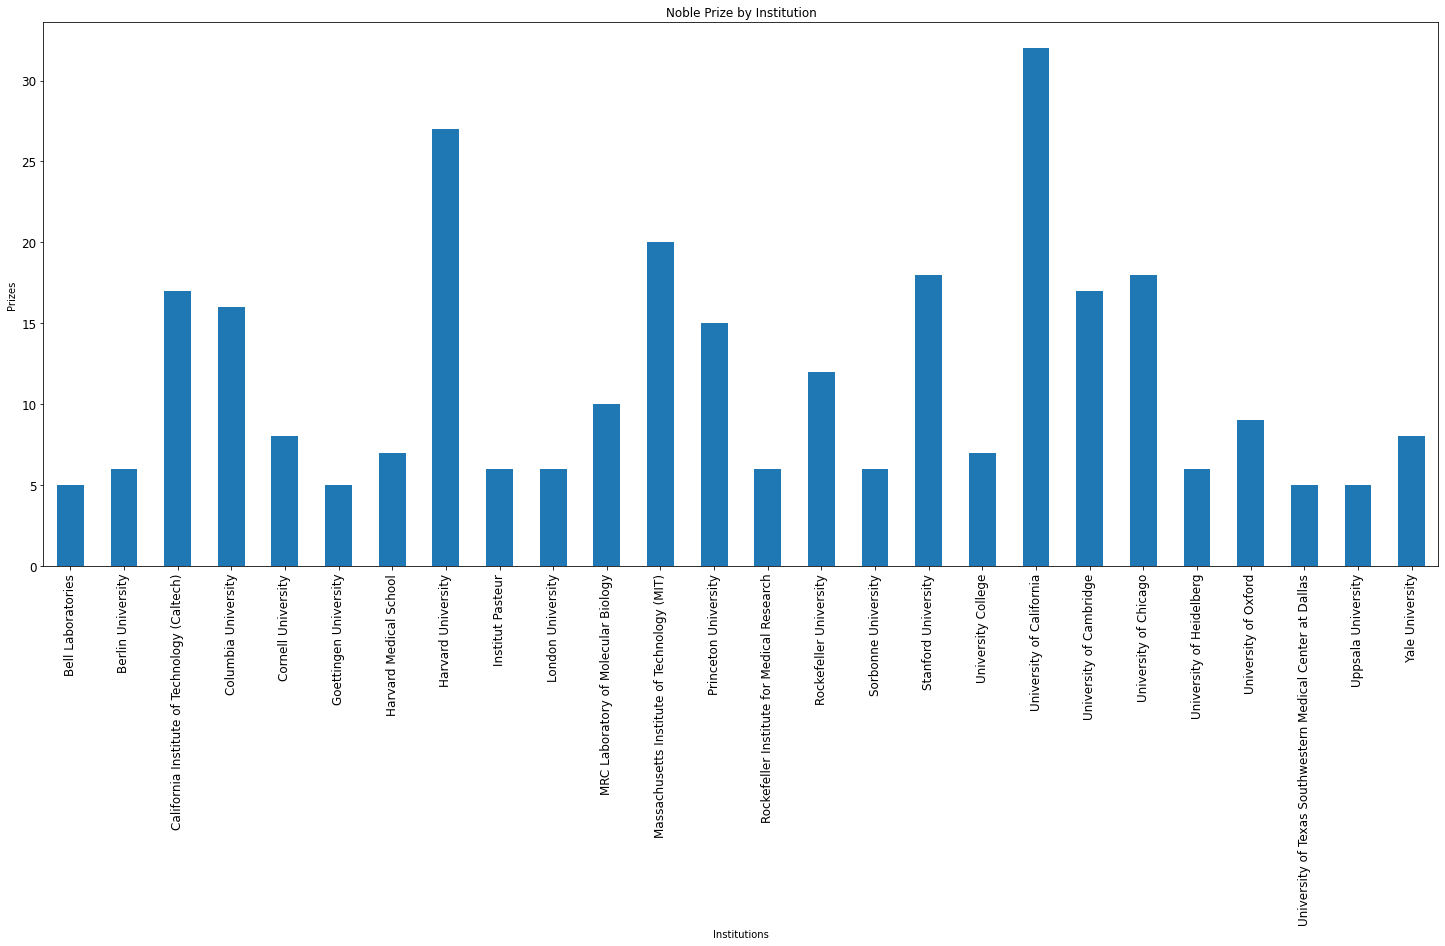

In [230]:
subset[subset['size'] > 4].plot(kind='bar', figsize=(25,10), x='name_of_university', title='Noble Prize by Institution', xlabel='Institutions', ylabel='Prizes', fontsize=12, legend=False)

In [184]:
subset[subset['size'] > 4]

,name_of_university,size
13,Bell Laboratories,5
15,Berlin University,6
28,California Institute of Technology (Caltech),17
40,Columbia University,16
43,Cornell University,8
63,Goettingen University,5
70,Harvard Medical School,7
71,Harvard University,27
85,Institut Pasteur,6
125,London University,6


<AxesSubplot:xlabel='born_month'>

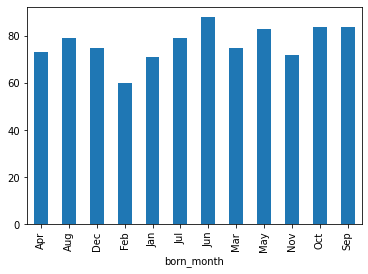

In [97]:
data.groupby('born_month').size().plot(kind='bar')

<AxesSubplot:title={'center':'Noble Prize versus Age'}, xlabel='Age', ylabel='Prizes'>

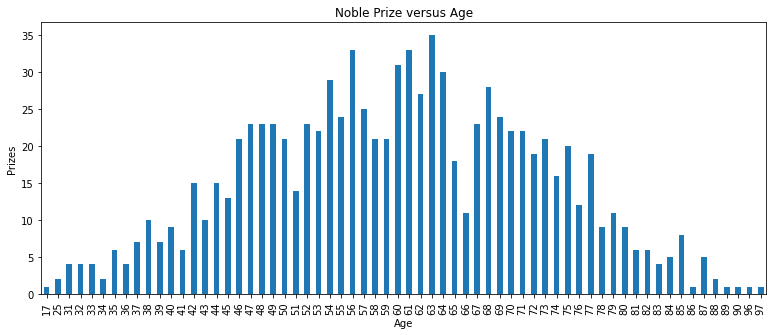

In [143]:
data.groupby('age_get_prize').size().plot(kind='bar', figsize=(13,5), title='Noble Prize versus Age', xlabel='Age', ylabel='Prizes')

<AxesSubplot:title={'center':'Noble Prize versus Age'}, xlabel='Age', ylabel='Prizes'>

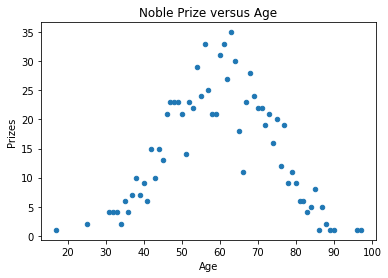

In [182]:
data.groupby('age_get_prize', as_index=False).size().plot(kind='scatter',x='age_get_prize',y='size', title='Noble Prize versus Age', xlabel='Age', ylabel='Prizes')

<AxesSubplot:ylabel='Frequency'>

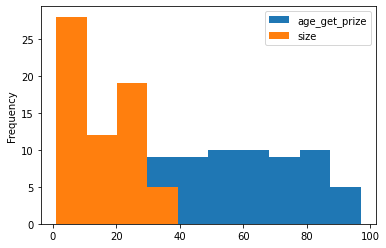

In [181]:
data.groupby('age_get_prize', as_index=False).size().plot(kind='hist')

<AxesSubplot:xlabel='category', ylabel='age_get_prize'>

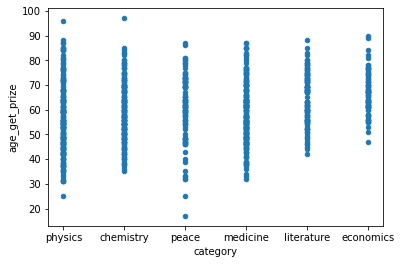

In [117]:
data.plot(kind='scatter',x='category',y='age_get_prize')

<AxesSubplot:xlabel='gender', ylabel='age_get_prize'>

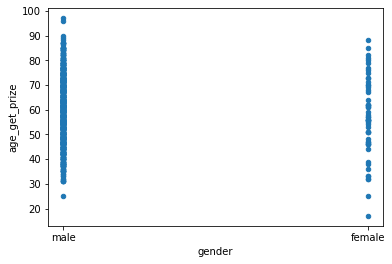

In [118]:
data.plot(kind='scatter',x='gender',y='age_get_prize')

<AxesSubplot:xlabel='born_country_code'>

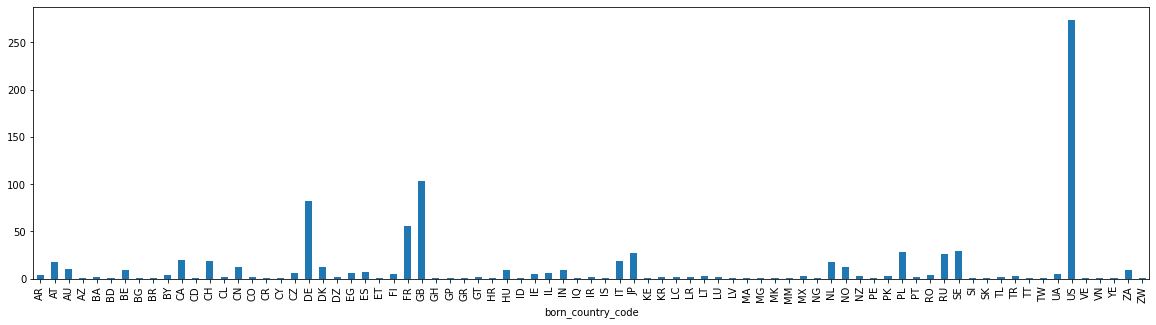

In [152]:
data.groupby('born_country_code').size().plot(kind='bar', figsize=(20,5))

In [15]:
data

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL_CONSUMPTION*,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2_EMISSIONS
0,2001,ACURA,1.7EL,COMPACT,1.7,4,A4,X,9.3,7.2,8.3,34,191
1,2001,ACURA,1.7EL,COMPACT,1.7,4,M5,X,8.9,7.4,8.3,34,191
2,2001,ACURA,3.2CL,COMPACT,3.2,6,AS5,Z,13.7,8.8,11.5,25,265
3,2001,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.8,8.8,11.6,24,267
4,2001,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,10.9,13.1,22,301
...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,2001,VOLVO,V70 T5 WAGON TURBO,STATION WAGON - MID-SIZE,2.3,5,M5,Z,13.0,9.3,11.3,25,260
675,2001,VOLVO,V70 WAGON,STATION WAGON - MID-SIZE,2.4,5,A5,Z,12.8,9.3,11.2,25,258
676,2001,VOLVO,V70 WAGON,STATION WAGON - MID-SIZE,2.4,5,M5,Z,12.5,9.3,11.0,26,253
677,2001,VOLVO,V70 WAGON AWD TURBO,STATION WAGON - MID-SIZE,2.4,5,AS5,Z,14.4,10.3,12.5,23,288


In [54]:
data.columns = [c.replace(' ', '_') for c in data.columns]

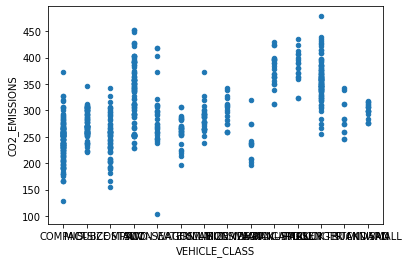

In [61]:
scat=data.plot(kind='scatter',x='VEHICLE_CLASS',y='CO2_EMISSIONS')

<AxesSubplot:xlabel='ENGINE_SIZE', ylabel='CO2_EMISSIONS'>

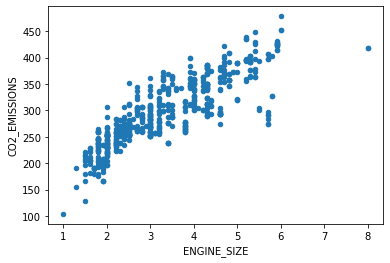

In [62]:
data.plot(kind='scatter',x='ENGINE_SIZE',y='CO2_EMISSIONS')

<AxesSubplot:xlabel='ENGINE_SIZE'>

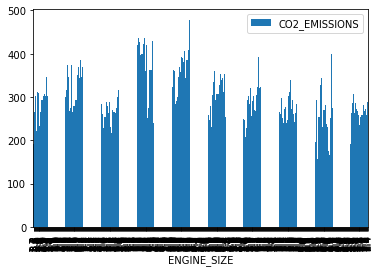

In [64]:
data.plot(kind='bar',x='ENGINE_SIZE',y='CO2_EMISSIONS')

<AxesSubplot:xlabel='VEHICLE_CLASS'>

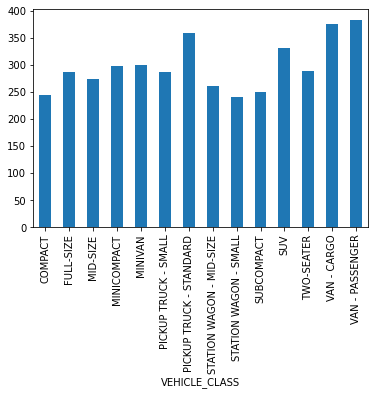

In [56]:
data.groupby('VEHICLE_CLASS')['CO2_EMISSIONS'].mean().plot(kind='bar',x='VEHICLE_CLASS',y='CO2_EMISSIONS')

<AxesSubplot:xlabel='VEHICLE CLASS'>

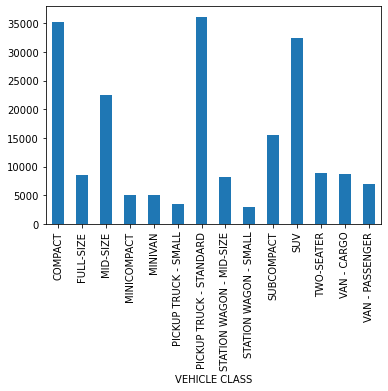

In [26]:
data.groupby('VEHICLE CLASS')['CO2_EMISSIONS'].sum().plot(kind='bar',x='VEHICLE CLASS',y='CO2_EMISSIONS')

<AxesSubplot:xlabel='MAKE'>

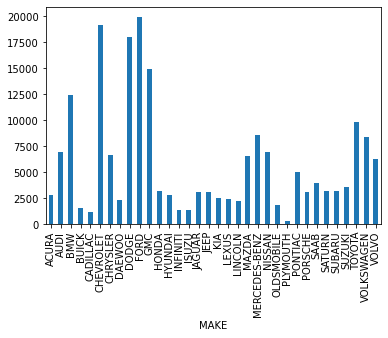

In [27]:
data.groupby('MAKE')['CO2_EMISSIONS'].sum().plot(kind='bar',x='MAKE',y='CO2_EMISSIONS')

<AxesSubplot:xlabel='MAKE'>

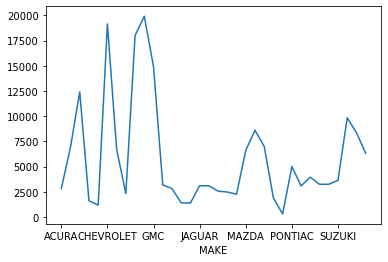

In [34]:
data.groupby('MAKE')['CO2_EMISSIONS'].sum().plot(kind='line',x='MAKE',y='CO2_EMISSIONS')

In [45]:
data.groupby('MAKE')['CO2_EMISSIONS'].sum().plot(kind='scatter',x='MAKE',y='CO2_EMISSIONS')

ValueError: plot kind scatter can only be used for data frames

In [46]:
data.groupby('MAKE')['CO2_EMISSIONS'].sum()

MAKE
ACURA             2816
AUDI              6939
BMW              12408
BUICK             1615
CADILLAC          1190
CHEVROLET        19145
CHRYSLER          6705
DAEWOO            2328
DODGE            17994
FORD             19905
GMC              14906
HONDA             3184
HYUNDAI           2829
INFINITI          1403
ISUZU             1395
JAGUAR            3104
JEEP              3101
KIA               2565
LEXUS             2485
LINCOLN           2258
MAZDA             6605
MERCEDES-BENZ     8606
NISSAN            7004
OLDSMOBILE        1881
PLYMOUTH           311
PONTIAC           5004
PORSCHE           3087
SAAB              3953
SATURN            3246
SUBARU            3253
SUZUKI            3635
TOYOTA            9843
VOLKSWAGEN        8365
VOLVO             6325
Name: CO2_EMISSIONS, dtype: int64

<AxesSubplot:ylabel='Frequency'>

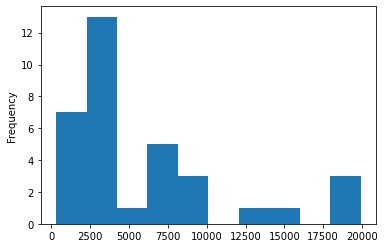

In [36]:
data.groupby('MAKE')['CO2_EMISSIONS'].sum().plot(kind='hist',x='MAKE',y='CO2_EMISSIONS')

<AxesSubplot:xlabel='MAKE'>

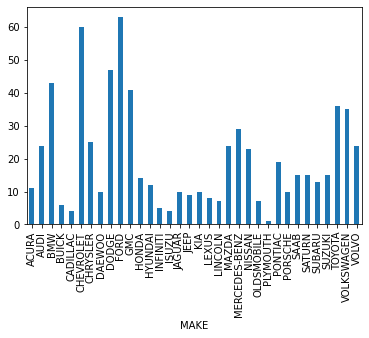

In [33]:
data.groupby('MAKE').size().plot(kind='bar')

In [39]:
data = pd.read_csv("workspace/training/ML-AI/datasets/Hourly Weather Data in Gallipoli (2008-2021).csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122733 entries, 0 to 122732
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   DateTime                 122733 non-null  object 
 1   Temperature              122733 non-null  float64
 2   Sunshine Duration        122733 non-null  int64  
 3   Shortwave Radiation      122733 non-null  float64
 4   Relative Humidity        122733 non-null  int64  
 5   Mean Sea Level Pressure  122733 non-null  float64
 6   Soil Temperature         122733 non-null  float64
 7   Soil Moisture            122733 non-null  float64
 8   Wind Speed               122733 non-null  float64
 9   Wind Direction           122733 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 9.4+ MB


In [12]:
data.describe()

,Temperature,Sunshine Duration,Shortwave Radiation,Relative Humidity,Mean Sea Level Pressure,Soil Temperature,Soil Moisture,Wind Speed,Wind Direction
count,122733.000000,122733.000000,122733.000000,122733.000000,122733.000000,122733.000000,122733.000000,122733.000000,122733.000000
mean,15.670196,21.084680,202.333411,69.683924,1015.073141,16.336311,0.210705,19.391254,108.071393
std,8.192027,27.030718,272.710423,19.079325,6.795215,8.054375,0.067094,11.141315,91.270893
min,-13.800000,0.000000,0.000000,13.000000,981.300000,-5.200000,0.102000,0.000000,0.310000
25%,9.700000,0.000000,0.000000,55.000000,1010.600000,10.100000,0.153000,10.400000,44.090000
50%,15.500000,0.000000,16.020000,72.000000,1014.400000,15.900000,0.214000,18.300000,60.360000
75%,21.400000,56.000000,379.140000,86.000000,1019.200000,22.400000,0.263000,26.800000,195.020000
max,40.800000,60.000000,950.520000,100.000000,1043.600000,40.100000,0.433000,93.300000,360.000000


In [40]:
data

,DateTime,Temperature,Sunshine Duration,Shortwave Radiation,Relative Humidity,Mean Sea Level Pressure,Soil Temperature,Soil Moisture,Wind Speed,Wind Direction
0,1.01.2008 03:00,-0.1,0,0.0,92,1019.2,5.9,0.212,0.0,180.00
1,1.01.2008 04:00,2.5,0,0.0,92,1018.2,5.4,0.212,22.7,43.07
2,1.01.2008 05:00,2.9,0,0.0,95,1017.1,5.1,0.212,25.8,54.09
3,1.01.2008 06:00,3.9,0,0.0,95,1017.4,4.9,0.212,25.8,59.86
4,1.01.2008 07:00,4.9,0,0.0,93,1016.4,5.1,0.211,26.7,61.02
...,...,...,...,...,...,...,...,...,...,...
122728,31.12.2021 19:00,6.3,0,0.0,92,1023.1,9.1,0.260,11.9,54.87
122729,31.12.2021 20:00,5.8,0,0.0,94,1023.3,8.2,0.260,10.7,70.35
122730,31.12.2021 21:00,5.2,0,0.0,93,1023.4,7.5,0.260,9.1,71.57
122731,31.12.2021 22:00,5.0,0,0.0,93,1023.8,6.8,0.260,8.2,61.19


In [44]:
data = pd.read_csv("workspace/training/ML-AI/datasets/auto-co2.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MODEL              679 non-null    int64  
 1   MAKE               679 non-null    object 
 2   MODEL.1            679 non-null    object 
 3   VEHICLE CLASS      679 non-null    object 
 4   ENGINE_SIZE        679 non-null    float64
 5   CYLINDERS          679 non-null    int64  
 6   TRANSMISSION       679 non-null    object 
 7   FUEL               679 non-null    object 
 8   FUEL_CONSUMPTION*  679 non-null    float64
 9   Unnamed: 9         679 non-null    float64
 10  Unnamed: 10        679 non-null    float64
 11  Unnamed: 11        679 non-null    int64  
 12  CO2_EMISSIONS      679 non-null    int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 69.1+ KB


In [14]:
data.describe()

,MODEL,ENGINE_SIZE,CYLINDERS,FUEL_CONSUMPTION*,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2_EMISSIONS
count,679.0,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000
mean,2001.0,3.252577,5.798233,14.591900,10.613844,12.802798,23.107511,293.656848
std,0.0,1.203751,1.531073,3.025654,2.357724,2.685590,5.308083,60.372456
min,2001.0,1.000000,3.000000,4.900000,4.000000,4.500000,14.000000,104.000000
25%,2001.0,2.200000,4.000000,12.700000,9.000000,11.000000,19.000000,253.000000
50%,2001.0,3.000000,6.000000,14.300000,10.100000,12.300000,23.000000,283.000000
75%,2001.0,4.200000,6.000000,16.650000,12.500000,14.850000,26.000000,340.000000
max,2001.0,8.000000,12.000000,23.200000,18.000000,20.800000,63.000000,478.000000
